# Parallelisation
Nodes executing parallely don't depend on each other.

--emerging from a same node and then executing parallely then then get's combined in the node downstream

In [1]:
from json import load
import os
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()
os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")

llm=ChatGoogleGenerativeAI(model="gemini-2.5-flash")
# result=llm.invoke("hey there!!")
# result

In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display

class State(TypedDict):
    topic:str
    characters:str
    settings:str
    premises:str
    story_intro:str

In [6]:
def generate_character(state:State):
    msg=llm.invoke(f"Generate two characters and brief traits for a story about: {state["topic"]}")
    return {"characters":msg.content}
def generate_settings(state:State):
    msg=llm.invoke(f"Describe a vivid settings for a story about: {state["topic"]}")
    return {"settings":msg.content}
def generate_premise(state:State):
    msg=llm.invoke(f"Give a one sentence plot premise for a story about: {state["topic"]}")
    return {"premises":msg.content}
def combine_elements(state:State):
    msg=llm.invoke(f"Give a story introduction using these elements:\n"
    f"Characters: {state["characters"]}"
    f"settings: {state["settings"]}"
    f"premises: {state["premises"]}")
    return {"story_intro":msg.content}



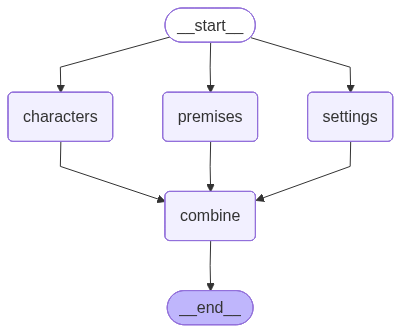

In [8]:
builder=StateGraph(State)
builder.add_node("characters",generate_character)
builder.add_node("settings",generate_settings)
builder.add_node("premises",generate_premise)
builder.add_node("combine",combine_elements)

builder.add_edge(START,"characters")
builder.add_edge(START,"settings")
builder.add_edge(START,"premises")
builder.add_edge("characters","combine")
builder.add_edge("settings","combine")
builder.add_edge("premises","combine")
builder.add_edge("combine",END)
graph=builder.compile()


display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
result=graph.invoke({"topic":"Big Bang"})

In [12]:
result["story_intro"]

'In the ultimate blank page, where the very concepts of "before" and "after" were meaningless whispers, resided Singula. She was the Void Before the Threshold, not darkness, for darkness required space, but the absence of *everything*. An incomprehensibly ancient, silent, immensely dense knot of pure potential, Singula held every atom, every star, every thought within her terrifying stillness. Her "thoughts" were the unmanifested reality itself, a silent hum of infinite possibility, a cosmic breath held for an eternity that didn\'t exist. She was the absolute zero of existence, pregnant with the infinite, waiting for the merest tremor to unleash the cosmos.\n\nThe tremor came not from within, but from a tear in the fabric of non-existence. A desperate, impossible intrusion. **Elias Thorne**, a refugee from a dying future, plunged through the impossible barrier, his temporal vessel a flickering ghost against the backdrop of absolute nullity. He was a paradox, a desperate plea for a diff